# Initial data processing

### Unzip data

In [3]:
import pandas as pd

In [4]:
# Joint forecastdemand_nsw files into a single file.
#data/NSW/forecastdemand_nsw.csv.zip.partaa
!cat ../data/NSW/forecastdemand_nsw.csv.zip.parta* > ../data/NSW/forecastdemand_nsw.csv.zip

In [1]:
# Unzip the data files into the data folder
!unzip ../data/NSW/forecastdemand_nsw.csv.zip -d ../data
!unzip ../data/NSW/temperature_nsw.csv.zip -d ../data
!unzip ../data/NSW/totaldemand_nsw.csv.zip -d ../data

Archive:  ../data/NSW/forecastdemand_nsw.csv.zip
  inflating: ../data/forecastdemand_nsw.csv  
Archive:  ../data/NSW/temperature_nsw.csv.zip
  inflating: ../data/temperature_nsw.csv  
Archive:  ../data/NSW/totaldemand_nsw.csv.zip
  inflating: ../data/totaldemand_nsw.csv  


### Forecast Demand Data

In [152]:
#read csv files into pandas dataframes
forecastdemand_nsw = pd.read_csv('../data/forecastdemand_nsw.csv')

In [153]:
forecastdemand_nsw.shape

(10906019, 6)

In [154]:
forecastdemand_nsw.head()


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2009123018,NSW1,71,7832.04,2009-12-30 12:31:49,2010-01-01 00:00:00
1,2009123019,NSW1,70,7832.04,2009-12-30 13:01:43,2010-01-01 00:00:00
2,2009123020,NSW1,69,7832.03,2009-12-30 13:31:36,2010-01-01 00:00:00
3,2009123021,NSW1,68,7832.03,2009-12-30 14:01:44,2010-01-01 00:00:00
4,2009123022,NSW1,67,7830.96,2009-12-30 14:31:35,2010-01-01 00:00:00


In [155]:
#count unique values in the forecastdemand_nsw dataframe REGIONID column
forecastdemand_nsw['REGIONID'].value_counts()


REGIONID
NSW1    10906019
Name: count, dtype: int64

In [156]:
forecastdemand_nsw['PERIODID'].value_counts()

PERIODID
32    196505
17    196505
30    196505
29    196505
28    196505
       ...  
75     20467
76     16373
77     12279
78      8187
79      4094
Name: count, Length: 79, dtype: int64

In [157]:
#min and max values in the forecastdemand_nsw dataframe DATETIME column 
forecastdemand_nsw['DATETIME'].min(), forecastdemand_nsw['DATETIME'].max()


('2010-01-01 00:00:00', '2021-03-18 00:00:00')

In [158]:
#show summary statistics
forecastdemand_nsw.describe()

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND
count,1.090602e+07,1.090602e+07,1.090602e+07
mean,2.015176e+09,2.997893e+01,8.066719e+03
std,3.234616e+06,1.869682e+01,1.315959e+03
min,2.009123e+09,1.000000e+00,4.422460e+03
25%,2.012102e+09,1.400000e+01,7.077970e+03
50%,2.015081e+09,2.800000e+01,8.007550e+03
75%,2.018053e+09,4.300000e+01,8.925610e+03
max,2.021032e+09,7.900000e+01,1.473666e+04


In [159]:
#data types of the forecastdemand_nsw dataframe
forecastdemand_nsw.dtypes

PREDISPATCHSEQNO      int64
REGIONID             object
PERIODID              int64
FORECASTDEMAND      float64
LASTCHANGED          object
DATETIME             object
dtype: object

In [160]:
#check for missing values
forecastdemand_nsw.isnull().sum()

PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

In [161]:
#find rows for  10 max values of FORECASTDEMAND in the forecastdemand_nsw dataframe
forecastdemand_nsw.nlargest(10, 'FORECASTDEMAND')


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
6920370,2017021023,NSW1,3,14736.66,2017-02-10 15:01:21,2017-02-10 16:30:00
6920365,2017021018,NSW1,8,14734.89,2017-02-10 12:31:40,2017-02-10 16:30:00
6920364,2017021017,NSW1,9,14734.40,2017-02-10 12:00:45,2017-02-10 16:30:00
6920362,2017021015,NSW1,11,14733.99,2017-02-10 11:00:48,2017-02-10 16:30:00
6920363,2017021016,NSW1,10,14732.91,2017-02-10 11:30:48,2017-02-10 16:30:00
6920369,2017021022,NSW1,4,14726.67,2017-02-10 14:31:33,2017-02-10 16:30:00
6920366,2017021019,NSW1,7,14724.60,2017-02-10 13:01:33,2017-02-10 16:30:00
6920368,2017021021,NSW1,5,14724.20,2017-02-10 14:01:29,2017-02-10 16:30:00
6920367,2017021020,NSW1,6,14721.74,2017-02-10 13:31:23,2017-02-10 16:30:00
6920418,2017021015,NSW1,12,14680.47,2017-02-10 11:00:48,2017-02-10 17:00:00


In [162]:
#find rows for  10 min values of FORECASTDEMAND in the forecastdemand_nsw dataframe
forecastdemand_nsw.nsmallest(10, 'FORECASTDEMAND')

,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
5168899,2015042319,NSW1,78,4422.46,2015-04-23 13:02:09,2015-04-25 04:00:00
5168900,2015042320,NSW1,77,4423.27,2015-04-23 13:32:15,2015-04-25 04:00:00
5168901,2015042321,NSW1,76,4423.39,2015-04-23 14:01:57,2015-04-25 04:00:00
5168902,2015042322,NSW1,75,4424.85,2015-04-23 14:32:18,2015-04-25 04:00:00
5168898,2015042318,NSW1,79,4426.58,2015-04-23 12:32:10,2015-04-25 04:00:00
5168821,2015042319,NSW1,77,4504.09,2015-04-23 13:02:09,2015-04-25 03:30:00
5168822,2015042320,NSW1,76,4505.09,2015-04-23 13:32:15,2015-04-25 03:30:00
5168823,2015042321,NSW1,75,4505.28,2015-04-23 14:01:57,2015-04-25 03:30:00
5168820,2015042318,NSW1,78,4506.25,2015-04-23 12:32:10,2015-04-25 03:30:00
5168824,2015042322,NSW1,74,4507.47,2015-04-23 14:32:18,2015-04-25 03:30:00


In [163]:
#change the data type of the DATETIME column to datetime
forecastdemand_nsw['DATETIME'] = pd.to_datetime(forecastdemand_nsw['DATETIME'])


In [164]:
forecastdemand_nsw.dtypes

PREDISPATCHSEQNO             int64
REGIONID                    object
PERIODID                     int64
FORECASTDEMAND             float64
LASTCHANGED                 object
DATETIME            datetime64[ns]
dtype: object

Total Demand NSW

In [40]:
totaldemand_nsw = pd.read_csv('../data/totaldemand_nsw.csv')

In [59]:
totaldemand_nsw.shape

(196513, 3)

In [41]:
#check for missing values
totaldemand_nsw.isnull().sum()

DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

In [43]:
#summary statistics of the totaldemand_nsw dataframe
totaldemand_nsw.describe()

,TOTALDEMAND
count,196513.000000
mean,8113.145859
std,1299.532774
min,5074.630000
25%,7150.070000
50%,8053.230000
75%,8958.550000
max,14579.860000


In [44]:
totaldemand_nsw.dtypes

DATETIME        object
TOTALDEMAND    float64
REGIONID        object
dtype: object

In [45]:
#min and max values in the totaldemand_nsw dataframe DATETIME column
totaldemand_nsw['DATETIME'].min(), totaldemand_nsw['DATETIME'].max()

('1/1/2010 0:00', '9/9/2020 9:30')

In [48]:
#min and max values in the totaldemand_nsw dataframe TOTALDEMAND column
totaldemand_nsw['TOTALDEMAND'].min(), totaldemand_nsw['TOTALDEMAND'].max()

(5074.63, 14579.86)

In [47]:
#10 max values in the totaldemand_nsw dataframe TOTALDEMAND column
totaldemand_nsw.nlargest(10, 'TOTALDEMAND')

,DATETIME,TOTALDEMAND,REGIONID
19041,1/2/2011 16:30,14579.86,NSW1
19040,1/2/2011 16:00,14525.73,NSW1
19136,3/2/2011 16:00,14449.88,NSW1
19042,1/2/2011 17:00,14440.04,NSW1
19088,2/2/2011 16:00,14417.03,NSW1
19135,3/2/2011 15:30,14408.45,NSW1
19087,2/2/2011 15:30,14403.24,NSW1
19039,1/2/2011 15:30,14337.52,NSW1
19137,3/2/2011 16:30,14333.12,NSW1
19138,3/2/2011 17:00,14315.54,NSW1


In [51]:
#10 min values in the totaldemand_nsw dataframe TOTALDEMAND column
totaldemand_nsw.nsmallest(10, 'TOTALDEMAND')

,DATETIME,TOTALDEMAND,REGIONID
52328,26/12/2012 4:00,5074.63,NSW1
52327,26/12/2012 3:30,5088.73,NSW1
69847,26/12/2013 3:30,5113.03,NSW1
69848,26/12/2013 4:00,5124.08,NSW1
87368,26/12/2014 4:00,5138.11,NSW1
52326,26/12/2012 3:00,5141.31,NSW1
87367,26/12/2014 3:30,5143.15,NSW1
52329,26/12/2012 4:30,5147.59,NSW1
69846,26/12/2013 3:00,5152.93,NSW1
69849,26/12/2013 4:30,5169.80,NSW1


In [46]:
#count unique values in the totaldemand_nsw dataframe REGIONID column
totaldemand_nsw['REGIONID'].value_counts()

REGIONID
NSW1    196513
Name: count, dtype: int64

In [56]:
#totaldemand_nsw dataframe shape
totaldemand_nsw.shape

(196513, 3)

### Temperature NSW Data


In [64]:
#read csv files into pandas dataframes for temperature and totaldemand
temperature_nsw = pd.read_csv('../data/temperature_nsw.csv')

In [65]:
#temperature_nsw dataframe shape
temperature_nsw.shape

(220326, 3)

In [66]:
#check for missing values
temperature_nsw.isnull().sum()

LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64

In [71]:
#summary statistics of the temperature_nsw dataframe
temperature_nsw.describe()

,TEMPERATURE
count,220326.000000
mean,17.418827
std,5.849763
min,-1.300000
25%,13.400000
50%,17.700000
75%,21.300000
max,44.700000


In [72]:
#highest 10 temperature in the temperature_nsw dataframe
temperature_nsw.nlargest(10, 'TEMPERATURE')

,LOCATION,DATETIME,TEMPERATURE
196404,Bankstown,4/1/2020 13:00,44.7
196405,Bankstown,4/1/2020 13:30,44.6
59193,Bankstown,18/1/2013 13:00,44.4
196403,Bankstown,4/1/2020 12:30,44.1
157349,Bankstown,7/1/2018 13:00,43.9
196402,Bankstown,4/1/2020 12:00,43.9
59191,Bankstown,18/1/2013 12:28,43.6
59190,Bankstown,18/1/2013 12:09,43.5
59192,Bankstown,18/1/2013 12:30,43.5
59194,Bankstown,18/1/2013 13:09,43.5


In [73]:
#lowest 10 temperature in the temperature_nsw dataframe
temperature_nsw.nsmallest(10, 'TEMPERATURE')

,LOCATION,DATETIME,TEMPERATURE
167568,Bankstown,16/7/2018 6:30,-1.3
167567,Bankstown,16/7/2018 6:00,-1.2
167564,Bankstown,16/7/2018 4:30,-0.9
167565,Bankstown,16/7/2018 5:00,-0.7
167566,Bankstown,16/7/2018 5:30,-0.7
167569,Bankstown,16/7/2018 7:00,-0.6
9401,Bankstown,30/6/2010 5:00,-0.5
167560,Bankstown,16/7/2018 2:30,-0.5
9402,Bankstown,30/6/2010 5:30,-0.4
167562,Bankstown,16/7/2018 3:30,-0.4


### Data wrangling

In [77]:
#copy totaldemand_nsw to a new dataframe
totaldemand_nsw_copy = totaldemand_nsw.copy()
#remove REGIONID column from totaldemand_nsw_copy dataframe
totaldemand_nsw_copy.drop('REGIONID', axis=1, inplace=True)

In [75]:
totaldemand_nsw_copy.head()

,DATETIME,TOTALDEMAND,DATE
0,1/1/2010 0:00,8038.00,1/1/2010
1,1/1/2010 0:30,7809.31,1/1/2010
2,1/1/2010 1:00,7483.69,1/1/2010
3,1/1/2010 1:30,7117.23,1/1/2010
4,1/1/2010 2:00,6812.03,1/1/2010


In [78]:
#create a new DATE column with only date from DATETIME table datetime format is YYYY-MM-DD HH:MM:SS
totaldemand_nsw_copy['DATE'] = totaldemand_nsw_copy['DATETIME'].str.split(' ').str[0]

In [88]:
#convert datetime format to %m/%d/%Y %H:%M 
totaldemand_nsw_copy['DATETIME'] = pd.to_datetime(totaldemand_nsw_copy['DATETIME'], format='%d/%m/%Y %H:%M')

In [ ]:
#convert DATE column to datetime data type
totaldemand_nsw_copy['DATE'] = pd.to_datetime(totaldemand_nsw_copy['DATE'], format='%d/%m/%Y')

In [89]:
#copy year from DATE column to a new column
totaldemand_nsw_copy['YEAR'] = totaldemand_nsw_copy['DATE'].dt.year

In [90]:
totaldemand_nsw_copy.dtypes

DATETIME       datetime64[ns]
TOTALDEMAND           float64
DATE           datetime64[ns]
YEAR                    int32
dtype: object

In [91]:
#show TOTALDEMAND data aggregated by YEAR
totaldemand_nsw_copy.groupby('YEAR')['TOTALDEMAND'].sum()

YEAR
2010    1.543019e+08
2011    1.529197e+08
2012    1.449939e+08
2013    1.398375e+08
2014    1.387199e+08
2015    1.398054e+08
2016    1.401571e+08
2017    1.411039e+08
2018    1.401582e+08
2019    1.395390e+08
2020    1.354453e+08
2021    2.735699e+07
Name: TOTALDEMAND, dtype: float64

In [93]:

#copy TOTALDEMAND data aggregated by YEAR in a new df
total_demand_nsw_year = totaldemand_nsw_copy.groupby('YEAR')['TOTALDEMAND'].sum()
total_demand_nsw_year

YEAR
2010    1.543019e+08
2011    1.529197e+08
2012    1.449939e+08
2013    1.398375e+08
2014    1.387199e+08
2015    1.398054e+08
2016    1.401571e+08
2017    1.411039e+08
2018    1.401582e+08
2019    1.395390e+08
2020    1.354453e+08
2021    2.735699e+07
Name: TOTALDEMAND, dtype: float64

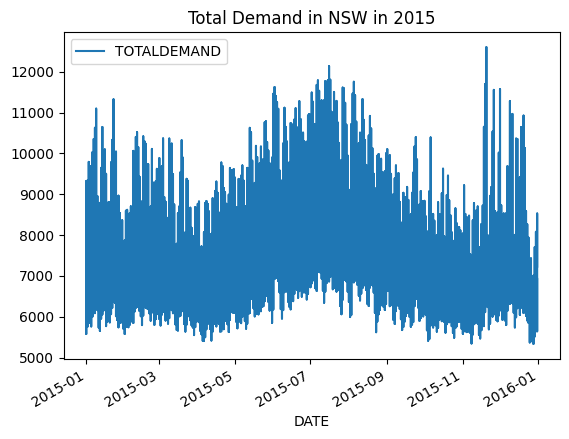

In [94]:
#plot totaldemand_nsw_copy data using matplotlib with YEAR 2015 data
import matplotlib.pyplot as plt
totaldemand_nsw_copy[totaldemand_nsw_copy['YEAR'] == 2015].plot(x='DATE', y='TOTALDEMAND', title='Total Demand in NSW in 2015')
plt.show()

<Axes: title={'center': 'Total Demand in NSW in 2010'}, xlabel='DATE'>

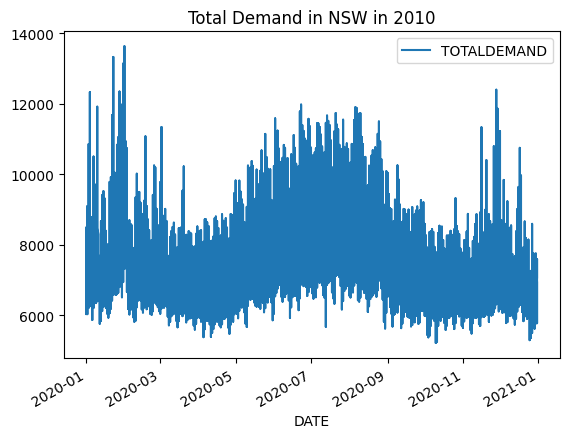

In [95]:
#plot totaldemand_nsw_copy data using matplotlib with YEAR 2020 data
totaldemand_nsw_copy[totaldemand_nsw_copy['YEAR'] == 2020].plot(x='DATE', y='TOTALDEMAND', title='Total Demand in NSW in 2010')

In [97]:
#create a dataframe with totaldemand_nsw_copy data aggregated by DATE
total_demand_nsw_date = totaldemand_nsw_copy.groupby('DATE')['TOTALDEMAND'].sum()
total_demand_nsw_date

DATE
2010-01-01    374464.94
2010-01-02    384838.07
2010-01-03    355195.18
2010-01-04    395602.57
2010-01-05    423735.03
                ...    
2021-03-14    340444.05
2021-03-15    332669.89
2021-03-16    351858.01
2021-03-17    356553.02
2021-03-18      7094.51
Name: TOTALDEMAND, Length: 4095, dtype: float64

In [98]:
#create a dataframe with totaldemand_nsw_date data only for 2020
total_demand_nsw_date_2020 = total_demand_nsw_date['2020']
total_demand_nsw_date_2020

DATE
2020-01-01    339887.61
2020-01-02    364425.94
2020-01-03    403666.87
2020-01-04    449051.87
2020-01-05    349984.93
                ...    
2020-12-27    317503.11
2020-12-28    322861.85
2020-12-29    327193.07
2020-12-30    329192.35
2020-12-31    326846.72
Name: TOTALDEMAND, Length: 366, dtype: float64

<Axes: title={'center': 'Total Demand in NSW in January 2020'}, xlabel='DATE'>

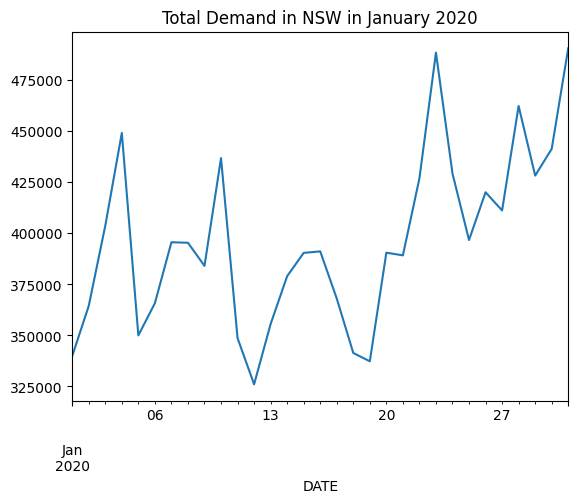

In [100]:
#plot total_demand_nsw_date_2020 data for january using matplotlib
total_demand_nsw_date_2020['2020-01'].plot(title='Total Demand in NSW in January 2020')



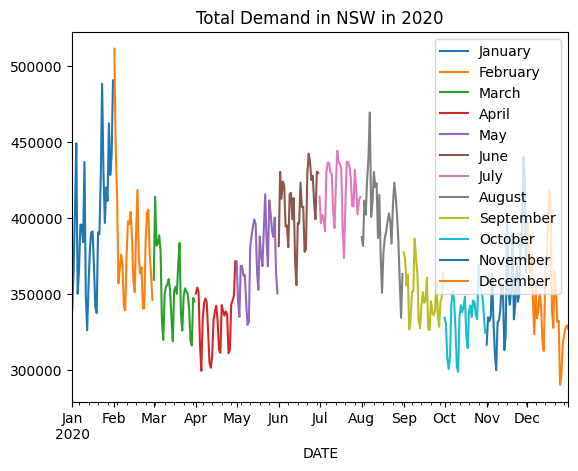

In [102]:
#in one plot show total_demand_nsw_date_2020 data for january to december using matplotlib
for month in range(1, 13):
    total_demand_nsw_date_2020[f'2020-{month:02}'].plot()
plt.title('Total Demand in NSW in 2020')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

# total_demand_nsw_date_2020['2020-01'].plot(title='Total Demand in NSW in January and July 2020')
# total_demand_nsw_date_2020['2020-07'].plot()
# plt.legend(['January', 'July'])
# plt.show()


In [108]:
#create a dataframe with totaldemand_nsw_copy data aggregated by DATE
total_demand_nsw_1 = totaldemand_nsw_copy.groupby('DATE')['TOTALDEMAND'].sum()
total_demand_nsw_1

DATE
2010-01-01    374464.94
2010-01-02    384838.07
2010-01-03    355195.18
2010-01-04    395602.57
2010-01-05    423735.03
                ...    
2021-03-14    340444.05
2021-03-15    332669.89
2021-03-16    351858.01
2021-03-17    356553.02
2021-03-18      7094.51
Name: TOTALDEMAND, Length: 4095, dtype: float64

In [109]:
#create a new column DATE with only date from DATETIME column in forecastdemand_nsw dataframe
forecastdemand_nsw['DATE'] = forecastdemand_nsw['DATETIME'].str.split(' ').str[0]
forecastdemand_nsw


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME,DATE
0,2009123018,NSW1,71,7832.04,2009-12-30 12:31:49,2010-01-01 00:00:00,2010-01-01
1,2009123019,NSW1,70,7832.04,2009-12-30 13:01:43,2010-01-01 00:00:00,2010-01-01
2,2009123020,NSW1,69,7832.03,2009-12-30 13:31:36,2010-01-01 00:00:00,2010-01-01
3,2009123021,NSW1,68,7832.03,2009-12-30 14:01:44,2010-01-01 00:00:00,2010-01-01
4,2009123022,NSW1,67,7830.96,2009-12-30 14:31:35,2010-01-01 00:00:00,2010-01-01
...,...,...,...,...,...,...,...
10906014,2021031736,NSW1,5,7028.45,2021-03-17 21:31:31,2021-03-18 00:00:00,2021-03-18
10906015,2021031737,NSW1,4,7041.65,2021-03-17 22:01:34,2021-03-18 00:00:00,2021-03-18
10906016,2021031738,NSW1,3,7087.60,2021-03-17 22:31:36,2021-03-18 00:00:00,2021-03-18
10906017,2021031739,NSW1,2,7087.28,2021-03-17 23:01:36,2021-03-18 00:00:00,2021-03-18


In [110]:
#copy DATETIME column to and FORECASTDEMAND column to a new dataframe
forecastdemand_nsw_daily = forecastdemand_nsw[['DATETIME', 'FORECASTDEMAND']].copy()
forecastdemand_nsw_daily

,DATETIME,FORECASTDEMAND
0,2010-01-01 00:00:00,7832.04
1,2010-01-01 00:00:00,7832.04
2,2010-01-01 00:00:00,7832.03
3,2010-01-01 00:00:00,7832.03
4,2010-01-01 00:00:00,7830.96
...,...,...
10906014,2021-03-18 00:00:00,7028.45
10906015,2021-03-18 00:00:00,7041.65
10906016,2021-03-18 00:00:00,7087.60
10906017,2021-03-18 00:00:00,7087.28


In [129]:
#convert DATE column to datetime object
forecastdemand_nsw_daily['DATETIME'] = pd.to_datetime(forecastdemand_nsw_daily['DATETIME'])

In [118]:
forecastdemand_nsw_daily.dtypes

DATETIME          datetime64[ns]
FORECASTDEMAND           float64
dtype: object

In [120]:
#create a new column DATE with only date from DATETIME column in forecastdemand_nsw_daily dataframe
forecastdemand_nsw_daily['DATE'] = forecastdemand_nsw_daily['DATETIME'].dt.date
forecastdemand_nsw_daily

,DATETIME,FORECASTDEMAND,DATE
0,2010-01-01,7832.04,2010-01-01
1,2010-01-01,7832.04,2010-01-01
2,2010-01-01,7832.03,2010-01-01
3,2010-01-01,7832.03,2010-01-01
4,2010-01-01,7830.96,2010-01-01
...,...,...,...
10906014,2021-03-18,7028.45,2021-03-18
10906015,2021-03-18,7041.65,2021-03-18
10906016,2021-03-18,7087.60,2021-03-18
10906017,2021-03-18,7087.28,2021-03-18


In [121]:
#copy FORECASTDEMAND data aggregated by DATE in a new dataframe
forecast_demand_nsw_date = forecastdemand_nsw_daily.groupby('DATE')['FORECASTDEMAND'].sum()
forecast_demand_nsw_date

DATE
2010-01-01    20640969.31
2010-01-02    20686269.81
2010-01-03    19879793.07
2010-01-04    22557183.97
2010-01-05    23402575.12
                 ...     
2021-03-14    18711971.46
2021-03-15    18793446.56
2021-03-16    19473031.17
2021-03-17    19513448.59
2021-03-18      494236.46
Name: FORECASTDEMAND, Length: 4095, dtype: float64

<Axes: title={'center': 'Forecast Demand in NSW'}, xlabel='DATE'>

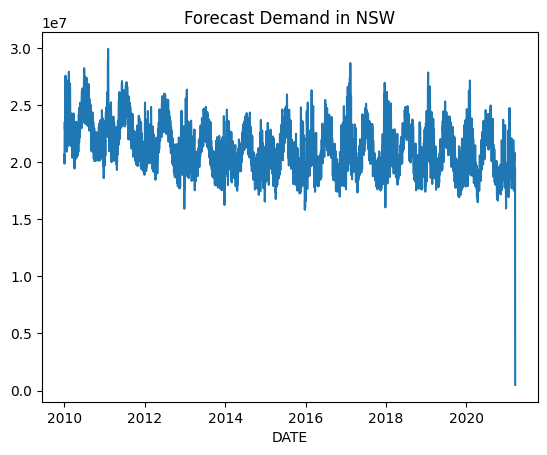

In [122]:
#plot forecast_demand_nsw_date data
forecast_demand_nsw_date.plot(title='Forecast Demand in NSW')


In [125]:
total_demand_nsw_date_2020

DATE
2020-01-01    339887.61
2020-01-02    364425.94
2020-01-03    403666.87
2020-01-04    449051.87
2020-01-05    349984.93
                ...    
2020-12-27    317503.11
2020-12-28    322861.85
2020-12-29    327193.07
2020-12-30    329192.35
2020-12-31    326846.72
Name: TOTALDEMAND, Length: 366, dtype: float64

In [137]:
forecast_demand_nsw_date

DATE
2010-01-01    20640969.31
2010-01-02    20686269.81
2010-01-03    19879793.07
2010-01-04    22557183.97
2010-01-05    23402575.12
                 ...     
2021-03-14    18711971.46
2021-03-15    18793446.56
2021-03-16    19473031.17
2021-03-17    19513448.59
2021-03-18      494236.46
Name: FORECASTDEMAND, Length: 4095, dtype: float64

In [131]:
forecast_demand_nsw_date.dtype

dtype('float64')

In [144]:
#create a new dataframe with forecast_demand_nsw_date
forecast_demand_nsw_date_df = pd.DataFrame(forecast_demand_nsw_date)
forecast_demand_nsw_date_df


,FORECASTDEMAND
DATE,
2010-01-01,20640969.31
2010-01-02,20686269.81
2010-01-03,19879793.07
2010-01-04,22557183.97
2010-01-05,23402575.12
...,...
2021-03-14,18711971.46
2021-03-15,18793446.56
2021-03-16,19473031.17


In [145]:
forecast_demand_nsw_date_df.dtypes

FORECASTDEMAND    float64
dtype: object

In [147]:
#reindex forecast_demand_nsw_date_df dataframe to DatetimeIndex
forecast_demand_nsw_date_df.index = pd.to_datetime(forecast_demand_nsw_date_df.index)
forecast_demand_nsw_date_df

,FORECASTDEMAND
DATE,
2010-01-01,20640969.31
2010-01-02,20686269.81
2010-01-03,19879793.07
2010-01-04,22557183.97
2010-01-05,23402575.12
...,...
2021-03-14,18711971.46
2021-03-15,18793446.56
2021-03-16,19473031.17


In [148]:
forecast_demand_nsw_date_df.dtypes

FORECASTDEMAND    float64
dtype: object

In [151]:
#filter forecast_demand_nsw_date data from 01-01-2020 to 31-12-2020
forecast_demand_nsw_date_2020 = forecast_demand_nsw_date_df['2020']
forecast_demand_nsw_date_2020


KeyError: '2020'